In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
!pip install kaggle

In [3]:
from ultralytics import YOLO

import torch
import os
import zipfile
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
DEVICE

'cuda'

In [5]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [6]:

# Установите права доступа
!chmod 600 kaggle.json

# Укажите Kaggle, где искать конфигурационный файл
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [7]:
!kaggle datasets download -d fareselmenshawii/face-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/fareselmenshawii/face-detection-dataset
License(s): CC0-1.0
 99% 4.40G/4.43G [00:09<00:00, 358MB/s]
100% 4.43G/4.43G [00:09<00:00, 512MB/s]


In [8]:
with zipfile.ZipFile('/content/face-detection-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/face_dataset')

In [9]:
model = YOLO('yolo12n.pt')

100%|██████████| 5.34M/5.34M [00:00<00:00, 71.4MB/s]


In [10]:
%%writefile /content/face_dataset/data.yaml
train: /content/face_dataset/images/train
val: /content/face_dataset/images/val

nc: 1
names: ['Human face']

Writing /content/face_dataset/data.yaml


In [18]:
results = model.train(
    data="/content/face_dataset/data.yaml",
    epochs=10,  # количество эпох
    imgsz=416,  # размер изображений
    batch=10,
    # workers = 8,
    device=DEVICE # GPU если доступен

    # Дополнительные параметры для лучшего качества
    # optimizer='AdamW',
    # lr0=0.01,
    # patience=15,
    # save=True,
    # plots=True,
    # name='face_detection_yolo12'
)


Ultralytics 8.3.150 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=10, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/face_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train22, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=1

train: Scanning /content/face_dataset/labels/train.cache... 13386 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13386/13386 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 909.2±692.5 MB/s, size: 308.9 KB)


val: Scanning /content/face_dataset/labels/val.cache... 3347 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3347/3347 [00:00<?, ?it/s]


Plotting labels to runs/detect/train22/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.00046875), 119 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train22
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10     0.998G      1.139       0.59      1.007         15        416: 100%|██████████| 1339/1339 [03:25<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 168/168 [00:19<00:00,  8.76it/s]


                   all       3347      10299      0.885      0.719       0.81       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      1.02G      1.197      0.668      1.037         39        416: 100%|██████████| 1339/1339 [03:06<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 168/168 [00:17<00:00,  9.36it/s]


                   all       3347      10299      0.885      0.715      0.801       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      1.02G      1.219     0.6943       1.05         22        416: 100%|██████████| 1339/1339 [02:59<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 168/168 [00:18<00:00,  9.27it/s]


                   all       3347      10299      0.888      0.711      0.798      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      1.04G      1.219     0.6973       1.05          8        416: 100%|██████████| 1339/1339 [02:58<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 168/168 [00:18<00:00,  9.22it/s]


                   all       3347      10299      0.887      0.722      0.805      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      1.04G      1.198     0.6684      1.038         11        416: 100%|██████████| 1339/1339 [02:59<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 168/168 [00:18<00:00,  9.18it/s]


                   all       3347      10299       0.89      0.717      0.806      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      1.04G       1.18     0.6438       1.03         14        416: 100%|██████████| 1339/1339 [02:59<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 168/168 [00:18<00:00,  9.30it/s]


                   all       3347      10299      0.896      0.728      0.809       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      1.04G       1.16     0.6182      1.022         13        416: 100%|██████████| 1339/1339 [02:56<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 168/168 [00:17<00:00,  9.37it/s]


                   all       3347      10299      0.893      0.739      0.823      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      1.04G      1.142     0.5922      1.015         22        416: 100%|██████████| 1339/1339 [02:59<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 168/168 [00:17<00:00,  9.47it/s]


                   all       3347      10299      0.894      0.751      0.828       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      1.04G      1.125     0.5755      1.006         18        416: 100%|██████████| 1339/1339 [02:58<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 168/168 [00:17<00:00,  9.39it/s]


                   all       3347      10299      0.903      0.751      0.838      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      1.04G      1.108     0.5488     0.9961         12        416: 100%|██████████| 1339/1339 [02:52<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 168/168 [00:17<00:00,  9.41it/s]


                   all       3347      10299      0.904      0.752      0.838      0.551

10 epochs completed in 0.556 hours.
Optimizer stripped from runs/detect/train22/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22/weights/best.pt, 5.5MB

Validating runs/detect/train22/weights/best.pt...
Ultralytics 8.3.150 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv12n summary (fused): 159 layers, 2,556,923 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 168/168 [00:18<00:00,  9.13it/s]


                   all       3347      10299      0.903      0.752      0.838      0.551
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train22


In [17]:
import os
from pathlib import Path

# Подсчет изображений в train папке
train_path = '/content/face_dataset/images/train'
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.webp')

# Способ 1: через os.listdir
train_images = [f for f in os.listdir(train_path)
                if f.lower().endswith(image_extensions)]
print(f"Количество изображений в train: {len(train_images)}")


Количество изображений в train: 13386


In [ ]:
url = 'https://icdn.lenta.ru/images/2024/06/10/17/20240610171229836/owl_wide_1200_f8bd532f0d2d6f626579f1310e978d32.jpg'

res = model.predict(url, conf=0.6)


Found https://icdn.lenta.ru/images/2024/06/10/17/20240610171229836/owl_wide_1200_f8bd532f0d2d6f626579f1310e978d32.jpg locally at owl_wide_1200_f8bd532f0d2d6f626579f1310e978d32.jpg
image 1/1 /content/owl_wide_1200_f8bd532f0d2d6f626579f1310e978d32.jpg: 288x416 6 Human faces, 19.8ms
Speed: 2.6ms preprocess, 19.8ms inference, 2.3ms postprocess per image at shape (1, 3, 288, 416)


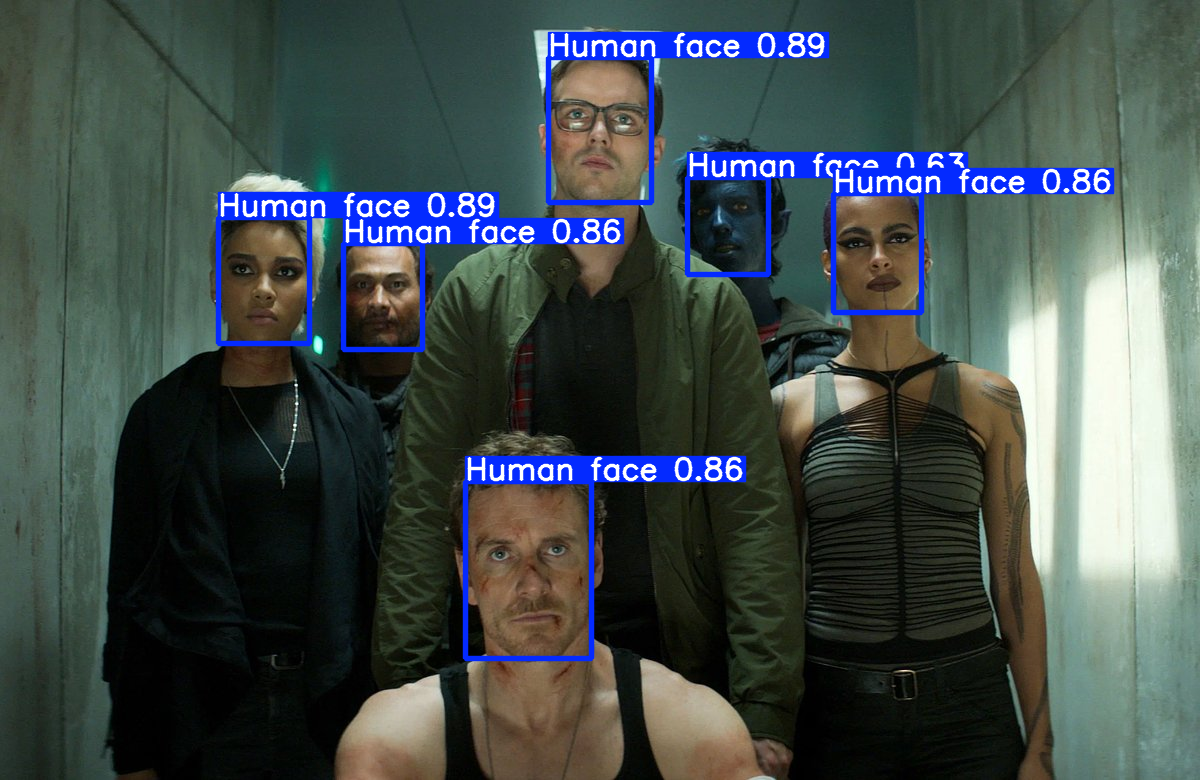

In [ ]:
# Process results list
for result in res:
    boxes = result.boxes  # bbox нужен для детекции
    masks = result.masks  # Маска нужна для сегментации
    keypoints = result.keypoints  # Для определения позы
    probs = result.probs  # Для классификации найденного объекта
    obb = result.obb  # Ориентированный bbox
    result.show()  # display to screen


0: 288x416 6 Human faces, 18.4ms
Speed: 1.5ms preprocess, 18.4ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 416)


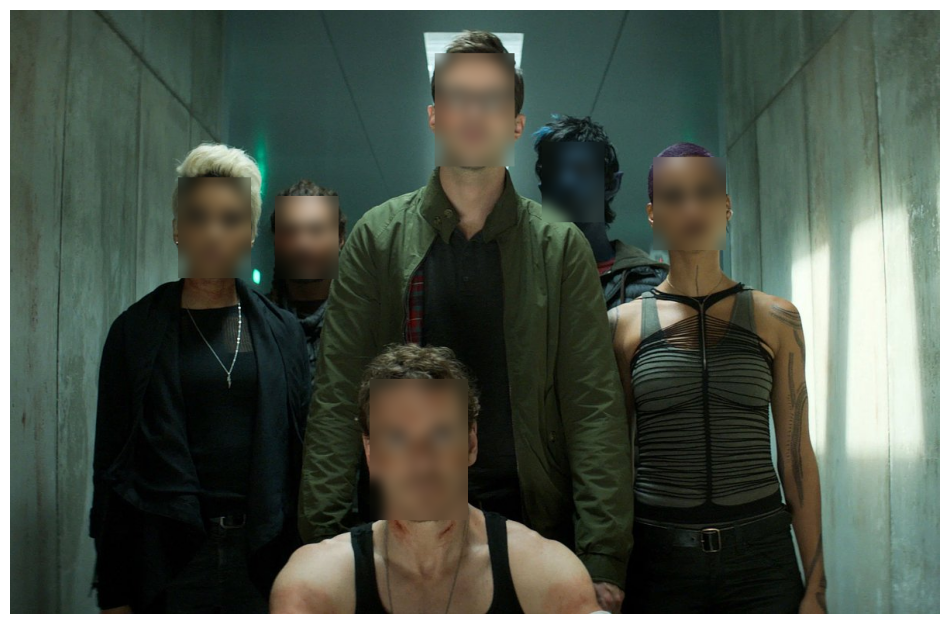

array([[[ 56,  68,  56],
        [ 56,  68,  56],
        [ 56,  67,  57],
        ...,
        [ 76,  89,  73],
        [ 75,  88,  72],
        [ 74,  87,  71]],

       [[ 57,  69,  57],
        [ 57,  69,  57],
        [ 57,  68,  58],
        ...,
        [ 75,  88,  72],
        [ 76,  89,  73],
        [ 77,  90,  74]],

       [[ 58,  70,  58],
        [ 58,  70,  58],
        [ 57,  68,  58],
        ...,
        [ 76,  89,  73],
        [ 79,  92,  76],
        [ 81,  94,  78]],

       ...,

       [[ 40,  49,  36],
        [ 40,  49,  36],
        [ 41,  50,  37],
        ...,
        [115, 123,  92],
        [110, 118,  87],
        [109, 117,  86]],

       [[ 38,  48,  35],
        [ 39,  49,  36],
        [ 39,  49,  36],
        ...,
        [114, 122,  91],
        [109, 117,  86],
        [108, 116,  85]],

       [[ 38,  48,  35],
        [ 38,  48,  35],
        [ 38,  48,  35],
        ...,
        [113, 121,  90],
        [109, 117,  86],
        [109, 117,  86]]

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

def blur_faces(url, model_path='/content/runs/detect/train222/weights/best.pt'):
    """
    Простая функция размытия лиц для URL

    Args:
        url: ссылка на изображение
        model_path: путь к обученной модели
    """

    # Загружаем модель
    model = YOLO(model_path)

    # Загружаем изображение из URL
    response = requests.get(url)
    image_array = np.array(Image.open(BytesIO(response.content)))
    image = cv2.cvtColor(image_array, cv2.COLOR_RGB2BGR)

    # Детекция лиц
    results = model(image, conf=0.5)

    # Размытие найденных лиц
    for result in results:
        if result.boxes is not None:
            for box in result.boxes:
                x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)

                # Извлекаем область лица
                face = image[y1:y2, x1:x2]

                # Размываем
                blurred_face = cv2.GaussianBlur(face, (99, 99), 8)

                # Вставляем обратно
                image[y1:y2, x1:x2] = blurred_face

    # Показываем результат
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    return image

blur_faces(url)